In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

iris_data = pd.read_csv("iris.csv")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
s_ns = lambda x: "s" if x=="setosa" else "ns"
iris_data["s_ns"] = iris_data["Species"].apply(s_ns)

C:\Users\hsbc_2019\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


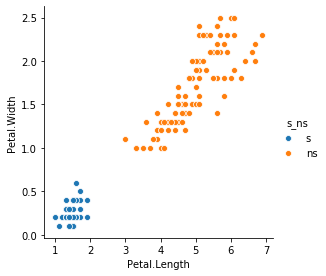

In [5]:
import seaborn as sns
sns.pairplot(iris_data,
                        x_vars = "Petal.Length", y_vars="Petal.Width",
                        hue="s_ns",size=4)

C:\Users\hsbc_2019\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


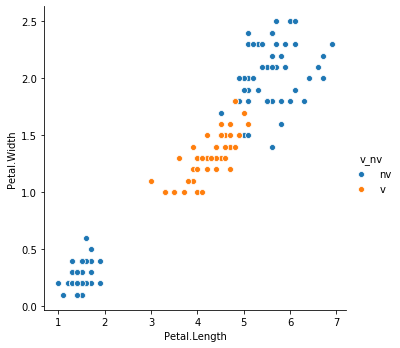

In [6]:
v_nv = lambda x: "v" if x=="versicolor" else "nv"
iris_data["v_nv"] = iris_data["Species"].apply(v_nv)
sns.pairplot(iris_data,
                        x_vars = "Petal.Length", y_vars="Petal.Width",
                        hue="v_nv",size=5)

In [7]:
#this encoding is in preparation to plotting the decision regions
iris_data.loc[iris_data.v_nv=="v", "v_nv"] = 0
iris_data.loc[iris_data.v_nv=="nv","v_nv"] = 1
features = ["Petal.Length", "Petal.Width"]
target = ["v_nv"]

In [8]:
#Fit the model
from sklearn.svm import SVC
model = SVC(kernel="rbf")
model.fit(iris_data[features], iris_data[target])


C:\Users\hsbc_2019\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Text(0.5, 1.0, 'Decision boundary of SVM RBF kernel on iris data')

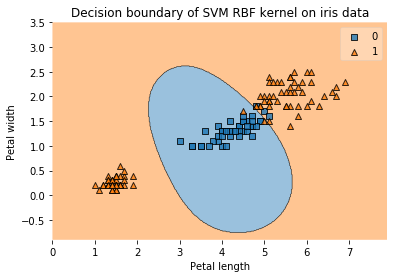

In [11]:
from mlxtend.plotting import plot_decision_regions
X = np.array(iris_data[features])
y = np.array(iris_data[target]).ravel()
plot_decision_regions(X,y,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Decision boundary of SVM RBF kernel on iris data")

C:\Users\hsbc_2019\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

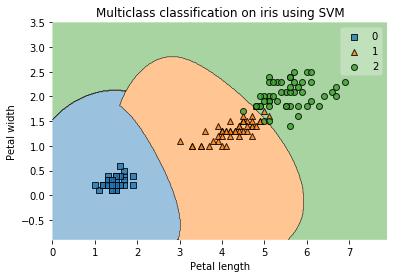

In [12]:
#Multi-class classification

iris_data.loc[iris_data.Species=="setosa","Species"] = 0
iris_data.loc[iris_data.Species=="versicolor","Species"] = 1
iris_data.loc[iris_data.Species=="virginica","Species"] = 2
iris_data.Species = iris_data.Species.astype("category")
features = ["Petal.Length", "Petal.Width"]
target = ["Species"]

#build the model
model = SVC(kernel="rbf")
model.fit(iris_data[features],iris_data[target])
X = np.array(iris_data[features])
y = np.array(iris_data[target]).ravel()
plot_decision_regions(X,y,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Multiclass classification on iris using SVM")